In [18]:
# importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from datetime import datetime

In [19]:
# cd data


In [20]:
df_1 = pd.read_csv('airnb_clean.csv')
df_2 = pd.read_csv('airnb_desert_clean.csv')
df_3 = pd.read_csv('airnb_luxe_clean.csv')

In [21]:
df_1_o = pd.read_csv('airnb.csv')
df_2_o = pd.read_csv('airnb_desert.csv', encoding="cp1252")
df_3_o = pd.read_csv('airnb_luxe.csv', encoding="cp1252")

In [22]:
df_1_o.head()

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed


In [23]:
df_1 = df_1.drop(columns=['Unnamed: 0'])

In [24]:
# df_1.groupby(['Start Month']).sum(['Price(in dollar)']).reset_index()
price_by_start_month = df_1.groupby('Start Month')['Price(in dollar)'].sum().reset_index().sort_values(by = 'Price(in dollar)', ascending = False)
min_price_by_start_month = df_1.groupby('Start Month')['Price(in dollar)'].min().reset_index().sort_values(by = 'Price(in dollar)', ascending = False)
max_price_by_start_month = df_1.groupby('Start Month')['Price(in dollar)'].max().reset_index().sort_values(by = 'Price(in dollar)', ascending = False)
mean_price_by_start_month = df_1.groupby('Start Month')['Price(in dollar)'].mean().reset_index().sort_values(by = 'Price(in dollar)', ascending = False)

In [25]:
price_by_start_month

,Start Month,Price(in dollar)
3,June,16194.0
2,July,3768.0
7,September,2358.0
4,May,2224.0
0,August,2183.0
6,October,541.0
1,January,513.0
5,November,60.0


In [26]:
min_price_by_start_month

,Start Month,Price(in dollar)
1,January,513.0
4,May,90.0
6,October,76.0
5,November,60.0
7,September,43.0
2,July,32.0
0,August,30.0
3,June,17.0


In [27]:
mean_price_by_start_month

,Start Month,Price(in dollar)
1,January,513.000000
7,September,235.800000
4,May,185.333333
0,August,181.916667
3,June,160.336634
2,July,150.720000
6,October,135.250000
5,November,60.000000


In [28]:
max_price_by_start_month

,Start Month,Price(in dollar)
3,June,1463.0
7,September,735.0
4,May,668.0
1,January,513.0
2,July,473.0
0,August,335.0
6,October,194.0
5,November,60.0


### The month of June is exceptionally high total price (in dollars).

In [29]:
june_only = df_1[df_1['Start Month'] == 'June'].sort_values(by = 'Price(in dollar)', ascending = False)

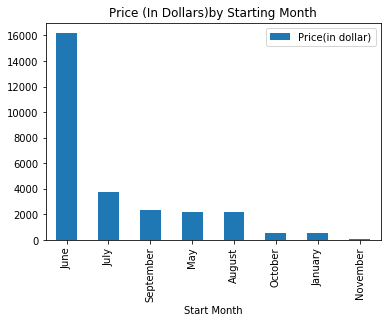

In [39]:
price_by_start_month.plot.bar(
    x = 'Start Month',
    y = 'Price(in dollar)',
    title = 'Price (In Dollars)by Starting Month'
)
plt.show()

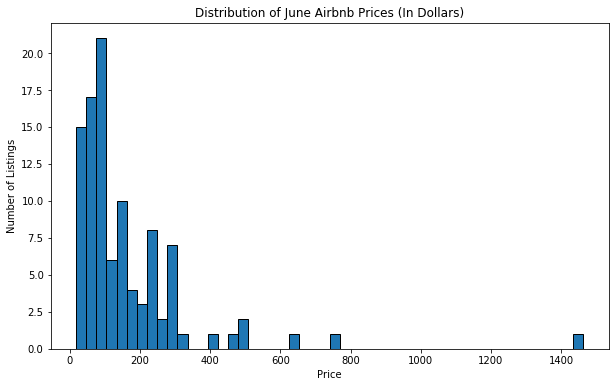

In [33]:
# trying to find outliers

plt.figure(figsize=(10,6))
plt.hist(june_only['Price(in dollar)'], bins=50, edgecolor='black')
plt.title("Distribution of June Airbnb Prices (In Dollars)")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

In [45]:
df_1_sorted = df_1.sort_values(by = 'Price(in dollar)', ascending = False)

In [50]:
df_1_clean = df_1_sorted[df_1_sorted['Price(in dollar)'] < 1463]

In [52]:
price_by_s_m = df_1_clean.groupby('Start Month')['Price(in dollar)'].sum().reset_index().sort_values(by = 'Price(in dollar)', ascending = False)

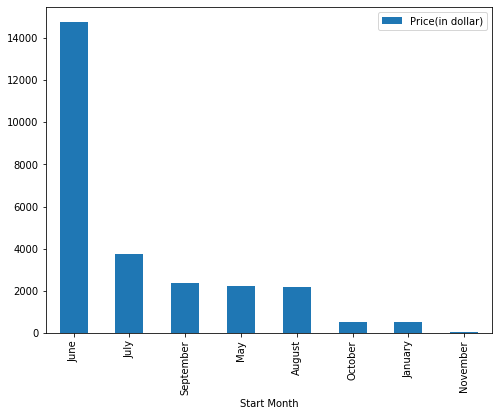

In [55]:
price_by_s_m.plot(x = 'Start Month', y = 'Price(in dollar)', kind = 'bar', figsize = (8,6))

### Plot All Months by Distribution

In [60]:
df_grouped = df_1_clean.groupby('Start Month').sum().reset_index()

In [63]:
df_grouped['Start Month'][0]

'August'

In [89]:
df = df_1_clean['Start Month'].unique().tolist()

In [93]:
df[0]

'June'

In [136]:
def month_df(df, column_name):
    list_df = []
    for i in df[column_name].unique().tolist():
        var_name = f"df_{i}"
        globals()[var_name] = df[df[column_name] == i]
        list_df.append(globals()[var_name])
        print(f"Created variable: {var_name}")
    return list_df

In [138]:
list_dfs = month_df(df_1_clean,'Start Month');

Created variable: df_June
Created variable: df_September
Created variable: df_May
Created variable: df_January
Created variable: df_July
Created variable: df_August
Created variable: df_October
Created variable: df_November


In [140]:
def create_histo(list):
    

,Title,Detail,Date Range,Start Month,Start Date,End Month,End Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
12,"Cottage in Wheatley, Canada","Cozy Modern Beach House w/ Pool, Hot Tub & More!",Jun 4 - 11,June,4,June,11,764.0,819.0,4.74 (19),2 queen beds
114,"Villa in Bacnotan, La Union, Philippines","Private Modern Beachfront Villa: Pool, Sunset ...",Jun 28 - Jul 3,June,28,July,Jul,628.0,189.0,5.0 (15),6 beds
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,June,6,June,11,485.0,170.0,4.77 (146),4 beds
15,"Home in Shirley, Canada",♨ Cedar Coast Lodge - Coastal retreat w/ HOT TUB,Jun 4 - 9,June,4,June,9,480.0,290.0,4.82 (125),5 beds
118,"Villa in Banjar, Indonesia",4br Lovina Paradise - Ocean View,Jun 9 - 14,June,9,June,14,460.0,275.0,4.93 (40),4 king beds
...,...,...,...,...,...,...,...,...,...,...,...
137,"Apartment in Melaka, Malaysia",B1933B/5 min drive to Jonker/Seaview/Imperio/4...,Jun 18 - 24,June,18,June,24,24.0,47.0,4.69 (196),4 beds
111,"Place to stay in Thành phố Hội An, Vietnam",Garden view twin room with breakfast-Ngan Phu,Jun 10 - 17,June,10,June,17,24.0,116.0,4.85 (255),2 single beds
132,"Condo in Melaka, Malaysia",B1731/Seaview/5 mine drive to Jonker/Imperio/4...,Jun 13 - 19,June,13,June,19,23.0,33.0,4.54 (209),3 beds
124,"Apartment in Bangkok, Thailand",Spacious Apt in City of Angels,Jun 8 - 13,June,8,June,13,19.0,46.0,4.95 (438),1 king bed


In [ ]:
# trying to find outliers

plt.figure(figsize=(10,6))
plt.hist(june_only['Price(in dollar)'], bins=50, edgecolor='black')
plt.title("Distribution of June Airbnb Prices (In Dollars)")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()